# TD1 : Manipulation des données

In [16]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Chargement du jeu de données

In [2]:
# Question 1 : Chargement du fichier

X = pd.read_csv("data/sy02-p2016.csv")
X

,nom,specialite,niveau,statut,dernier diplome obtenu,note median,correcteur median,note final,correcteur final,note totale,resultat
0,Etu1,GI,4,UTC,BAC,6.5,Cor6,5.0,Cor4,5.6,F
1,Etu2,GB,2,UTC,DUT,6.5,Cor6,13.0,Cor4,10.4,E
2,Etu3,GSU,4,UTC,BAC,14.0,Cor2,17.0,Cor3,15.8,B
3,Etu4,GSM,2,UTC,BAC,13.0,Cor2,13.5,Cor3,13.3,C
4,Etu5,GI,4,UTC,DUT,7.5,Cor2,11.5,Cor3,9.9,Fx
...,...,...,...,...,...,...,...,...,...,...,...
291,Etu292,GB,2,UTC,BTS,8.5,Cor5,9.0,Cor7,8.8,Fx
292,Etu293,GB,2,UTC,BAC,13.5,Cor4,18.0,Cor6,16.2,B
293,Etu294,GSU,2,UTC,BAC,12.0,Cor5,15.0,Cor7,13.8,C
294,Etu295,GSU,2,UTC,DUT,12.0,Cor6,18.0,Cor7,15.6,B


In [3]:
# Question 2 : nombre d'individus et de variables

len(X), len(X.columns)

(296, 11)

In [4]:
# Question 3 : Chargement d'autres jeux de données
X2 = pd.read_csv("data/sy02-p2016-2.csv", sep="&")
X3 = pd.read_csv("data/sy02-p2016-3.csv", sep="\t")
X4 = pd.read_csv("data/sy02-p2016-4.csv", sep=";")
X5 = pd.read_csv("data/sy02-p2016-5.csv", sep=" ", index_col=0)

In [5]:
# Vérification que les fichiers sont identiques

tab = [X, X2, X3, X4, X5]
for i in range(5):
    for j in range(5):
        if i != j:
            if not tab[i].equals(tab[j]):
                print(f"Différent {i} et {j}")

## 1.2 Conversion de types

In [6]:
# Question 4 : Vérification des types de variables

X.dtypes

nom                        object
specialite                 object
niveau                      int64
statut                     object
dernier diplome obtenu     object
note median               float64
correcteur median          object
note final                float64
correcteur final           object
note totale               float64
resultat                   object
dtype: object

In [7]:
statut_type = pd.CategoricalDtype(categories=["UTC", "Echange"])
specialite_type = pd.CategoricalDtype(categories=["GI", "GB", "GSU", "GSM", "GM", "TC", "GP", "ISS", "HuTech"])
correcteurs_type = pd.CategoricalDtype(categories=[f"Cor{i}" for i in range(1, 9)])
resultats_type = pd.CategoricalDtype(categories=["A", "B", "C", "D", "E", "Fx", "F", "ABS"], ordered=True)
dernier_diplome = pd.CategoricalDtype(categories=X["dernier diplome obtenu"].dropna().unique())

X["specialite"] = X["specialite"].astype(specialite_type)
X["dernier diplome obtenu"] = X["dernier diplome obtenu"].astype(dernier_diplome)
X["statut"] = X["statut"].astype(statut_type)
X["correcteur median"] = X["correcteur median"].astype(correcteurs_type)
X["correcteur final"] = X["correcteur final"].astype(correcteurs_type)
X["resultat"] = X["resultat"].astype(resultats_type)
X.dtypes

nom                         object
specialite                category
niveau                       int64
statut                    category
dernier diplome obtenu    category
note median                float64
correcteur median         category
note final                 float64
correcteur final          category
note totale                float64
resultat                  category
dtype: object

## 1.3 Transformation

In [8]:
# Transformation du nom de l'étudiant
X["nom"] = X["nom"].apply(lambda val : val[3:])
X["nom"] = X["nom"].astype(int)
X.dtypes

nom                          int32
specialite                category
niveau                       int64
statut                    category
dernier diplome obtenu    category
note median                float64
correcteur median         category
note final                 float64
correcteur final          category
note totale                float64
resultat                  category
dtype: object

In [9]:
# Question 5 : Récupération du semestre
semestres_df = pd.read_csv("data/effectifs.csv")

semestres_df["Semestre"] = semestres_df["Semestre"].apply(lambda val : val[8:])

# Question 6 : Extraction du semestre sous forme exploitable
semestres_df = semestres_df.assign(AP=lambda df: df['Semestre'].str[0], annee=lambda df: df['Semestre'].str[1:])

semestres_df

,Semestre,SY02,SY09,SY19,AP,annee
0,P2019,220,75.0,NaN,P,2019
1,A2019,180,NaN,82.0,A,2019
2,A2018,200,NaN,78.0,A,2018
3,P2018,210,76.0,NaN,P,2018
4,A2017,189,NaN,69.0,A,2017
5,P2017,230,102.0,NaN,P,2017
6,A2016,213,NaN,52.0,A,2016
7,P2016,242,93.0,NaN,P,2016


In [10]:
# Question 7 : COnversion du jeu de données au format long

semestres_df_long = semestres_df.melt(id_vars=["Semestre", "AP", "annee"], var_name="UV", value_name="effectifs").dropna()
semestres_df_long

,Semestre,AP,annee,UV,effectifs
0,P2019,P,2019,SY02,220.0
1,A2019,A,2019,SY02,180.0
2,A2018,A,2018,SY02,200.0
3,P2018,P,2018,SY02,210.0
4,A2017,A,2017,SY02,189.0
5,P2017,P,2017,SY02,230.0
6,A2016,A,2016,SY02,213.0
7,P2016,P,2016,SY02,242.0
8,P2019,P,2019,SY09,75.0
11,P2018,P,2018,SY09,76.0


In [11]:
# Question 9 : Format long avec le jeu iris

import seaborn as sns
iris = sns.load_dataset("iris")
iris_long = iris.melt(id_vars=["species"], value_name="Valeur", var_name='Variable')
iris_long

,species,Variable,Valeur
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


## 1.4 Jeu de données babies

In [12]:
# Question 10 : Chargement du jeu de données

babies_df = pd.read_csv("data/babies23.data", sep="\s+")
babies_df = babies_df[["wt", "gestation", "parity", "age", "ht", "wt.1", "smoke", "ed"]]
babies_df = babies_df.rename(columns={"wt" : "bwt", "ht" : "height", "wt.1" : "weight", "ed" : "education"})
babies_df

,bwt,gestation,parity,age,height,weight,smoke,education
0,120,284,1,27,62,100,0,5
1,113,282,2,33,64,135,0,5
2,128,279,1,28,64,115,1,2
3,123,999,2,36,69,190,3,5
4,108,282,1,23,67,125,1,5
...,...,...,...,...,...,...,...,...
1231,113,275,0,27,60,100,0,5
1232,128,265,1,24,67,120,0,5
1233,130,291,4,30,65,150,1,2
1234,125,281,0,21,65,110,0,4


Text(0.5, 0, 'Durée en jours')

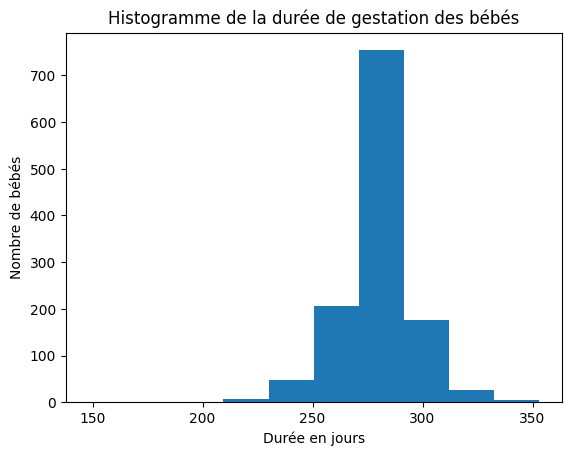

In [21]:
# Question 11 : histogramme des données

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(babies_df["gestation"])
ax.set_title("Histogramme de la durée de gestation des bébés")
ax.set_ylabel("Nombre de bébés")
ax.set_xlabel("Durée en jours")

In [22]:
# Question 12 : Remplacer les valeurs par NaN

babies_df["bwt"] = babies_df["bwt"].replace(99, np.nan)
babies_df["gestation"] = babies_df["gestation"].replace(999, np.nan)
babies_df["age"] = babies_df["age"].replace(99, np.nan)
babies_df["height"] = babies_df["height"].replace(99, np.nan)
babies_df["weight"] = babies_df["weight"].replace(999, np.nan)
babies_df["smoke"] = babies_df["smoke"].replace(9, np.nan)
babies_df["education"] = babies_df["education"].replace(9, np.nan)


In [23]:
# Question 13 : Recoder la variable smoke

babies_df["smoke"] = babies_df["smoke"].apply(lambda smoke : 1 if smoke == 1 else 0)
babies_df["smoke"]

0       0
1       0
2       1
3       0
4       1
       ..
1231    0
1232    0
1233    1
1234    0
1235    0
Name: smoke, Length: 1236, dtype: int64

## 1.5 Dissimilarité et distance

In [48]:
# Question 14 : Calcul de la quantité Sijk

def Sijk(tableau_dissimilarite, i : int, j : int, k : int):
    """Calcul de la quantité Sijk"""
    d_ij = tableau_dissimilarite[i][j]
    d_ik = tableau_dissimilarite[i][k]
    d_jk = tableau_dissimilarite[j][k]
    return 2 * (d_ij ** 2) * (d_ik ** 2) + 2 * (d_ij ** 2) * (d_jk ** 2) + 2 * (d_ik ** 2) * (d_jk ** 2) - (d_jk** 4) - (d_ij ** 4)

def Smin(tableau_dissimilarite):
    """Calcul de Smin"""
    Smin = None
    for i in range(len(tableau_dissimilarite)):
        for j in range(len(tableau_dissimilarite)):
            for k in range(len(tableau_dissimilarite)):
                if i != j and j != k and i != k and (Smin is None or Sijk(tableau_dissimilarite, i, j, k) < Smin):
                    Smin = Sijk(tableau_dissimilarite, i, j, k)
    return Smin

In [53]:
# Question 14 : Création de la dissimilarité

from numpy.random import default_rng

rng = default_rng()
N = 5
d = rng.exponential(scale=1, size=(N, N))
d = (d + d.T) / 2 # Symétrisation
np.fill_diagonal(d, 0)
d

array([[0.        , 0.30352441, 1.35245284, 0.44553075, 0.84698046],
       [0.30352441, 0.        , 1.15560301, 2.82594283, 2.56022562],
       [1.35245284, 1.15560301, 0.        , 1.53932398, 0.7569787 ],
       [0.44553075, 2.82594283, 1.53932398, 0.        , 0.82463901],
       [0.84698046, 2.56022562, 0.7569787 , 0.82463901, 0.        ]])

In [54]:
# Test des fonctions concues
print(Sijk(d, 0, 0, 0))
print(Smin(d))

0.0
-59.136440215113375


C:\Users\antoi\AppData\Local\Temp\ipykernel_22424\2452776201.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


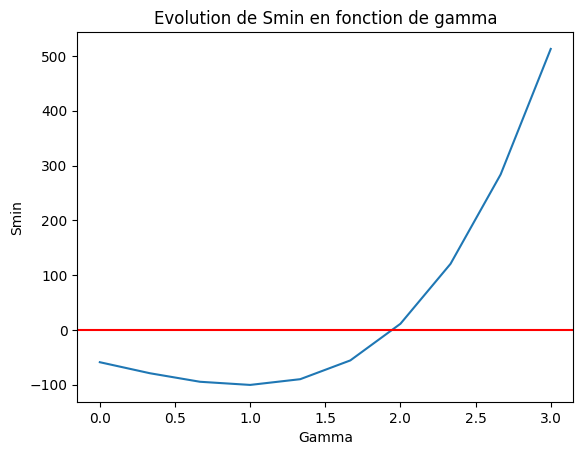

In [63]:
# Question 15 : Montrer expérimentalement qu'il existe un seuil gamma0

def create_d_prime(d, gamma):
    """Création de d prime à partir de gamma"""
    d_prime = d + gamma
    np.fill_diagonal(d_prime, 0)
    return d_prime


gamma_liste = np.linspace(d.min(), d.min() + 3, 10)
Smin_liste = [Smin(create_d_prime(d, gamma)) for gamma in gamma_liste]
fig, ax = plt.subplots()
ax.plot(gamma_liste, Smin_liste)
ax.set_title("Evolution de Smin en fonction de gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Smin")
ax.axhline(y=0.5, color='r', linestyle='-')
fig.show()


In [66]:
# Question 16 : Montrer expérimentalement la valeur de gamma0

def compute_gamma0(tableau_dissimilarite):
    """Calcul Gamma0"""
    Smax = None
    for i in range(len(tableau_dissimilarite)):
        for j in range(len(tableau_dissimilarite)):
            for k in range(len(tableau_dissimilarite)):
                gamma = tableau_dissimilarite[i][j] - tableau_dissimilarite[i][k] - tableau_dissimilarite[j][k]
                if i != j and j != k and i != k and (Smax is None or gamma > Smax):
                    Smax = gamma
    return Smax

compute_gamma0(d)


2.076887666182216

In [75]:
# Question 17 : Calcul de A
from math import sqrt
def compute_A_heron(a, b, c):
    """Calcul l'aire d'un triangle ayant a, b et c pour longueur de côté"""
    p = a + b + c
    return sqrt(p * (p - a) * (p - b) * (p - c))


# Vérification avec un test
print(f"Sijk = {Sijk(d, 1, 2, 3)}")
print(f"16*A^2 = {16 * (compute_A_heron(d[1][2], d[1][3], d[2][3])**2)}")

Sijk = 58.10553582894223
16*A^2 = 4137.490466432081
